In [2]:
import pandas as pd

In [22]:
url = 'http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/99b42b09-95af-47de-8411-ab99c380c3ef/download/vacinados.csv'
tabela = pd.read_csv(url, sep=';', encoding='utf-8')

C:\Users\User3\AppData\Local\Temp\ipykernel_23360\1113547414.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tabela = pd.read_csv(url, sep=';', encoding='utf-8')


In [23]:
tabela_empty = tabela.isna().any()
tabela_empty

faixa_etaria          True
idade                 True
sexo                  True
raca_cor              True
municipio             True
grupo                False
categoria             True
lote                  True
vacina_fabricante     True
descricao_dose        True
cnes                  True
sistema_origem        True
data_vacinacao        True
dtype: bool

In [24]:
tabela_empty= tabela.isna().sum()
tabela_empty

faixa_etaria              74
idade                      6
sexo                     252
raca_cor                 442
municipio               1573
grupo                      0
categoria            1028992
lote                     293
vacina_fabricante        280
descricao_dose           280
cnes                     280
sistema_origem           280
data_vacinacao           280
dtype: int64

In [25]:
tabela = tabela.dropna(subset=['idade'])
tabela_empty = tabela.isna().sum()
tabela_empty

faixa_etaria              68
idade                      0
sexo                     252
raca_cor                 442
municipio               1572
grupo                      0
categoria            1028989
lote                     293
vacina_fabricante        280
descricao_dose           280
cnes                     280
sistema_origem           280
data_vacinacao           280
dtype: int64

In [26]:
tabela.columns

Index(['faixa_etaria', 'idade', 'sexo', 'raca_cor', 'municipio', 'grupo',
       'categoria', 'lote', 'vacina_fabricante', 'descricao_dose', 'cnes',
       'sistema_origem', 'data_vacinacao'],
      dtype='object')

In [27]:
tabela.head(5)

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,30 a 34 anos,32,FEMININO,PARDA,OLINDA,TRABALHADORES DA SAÚDE,OUTROS,FF8842,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,NÃO,2021-10-07 00:00:00.0
1,35 a 39 anos,39,FEMININO,PARDA,IGARASSU,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,FD7210,3 - COMIRNATY (PFIZER),1.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-09-01 00:00:00.0
2,40 a 44 anos,40,FEMININO,PARDA,IGARASSU,PÚBLICO EM GERAL (18 a 59 anos),OUTROS,FH8023,3 - COMIRNATY (PFIZER),2.0,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,NÃO,2021-10-31 00:00:00.0
3,25 a 29 anos,25,MASCULINO,BRANCA,RECIFE,SESAU - BUSCA ATIVA,PÚBLICO EM GERAL - 18 A 59 ANOS,FH4751,3 - COMIRNATY (PFIZER),2.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,NÃO,2021-11-29 00:00:00.0
4,60 a 64 anos,61,FEMININO,BRANCA,RECIFE,IDOSOS,OUTRAS,FM3802,3 - COMIRNATY (PFIZER),3.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-12-30 00:00:00.0


In [29]:
print(f"Quantidade de pessoas vacinadas: ", len(tabela))

Quantidade de pessoas vacinadas:  3041492


## Municipio com mais dose de vacinas Coronavac:

In [41]:
tabela[['vacina_fabricante']].value_counts()

vacina_fabricante                                
3 - COMIRNATY (PFIZER)                               1171262
2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)    1029636
1 - CORONAVAC - SINOVAC (BUTANTAN)                    761380
4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)       78934
Name: count, dtype: int64

In [48]:
# dfSinovac = tabela.groupby('municipio')[['vacina_fabricante' == '1 - CORONAVAC - SINOVAC (BUTANTAN)']].value_counts()
# dfSinovac

# pesquisar consulta por valor

KeyError: 'Columns not found: False'

In [39]:
dosesCinovacPorCidade = dfSinovac.groupby("municipio").size()
dosesCinovacPorCidade

municipio
RECIFE                        2911861
JABOATÃO DOS GUARARAPES         37912
OLINDA                          33001
PAULISTA                        23319
CAMARAGIBE                      11843
                               ...   
JARDIM BRASIL                       1
ARMAÇÃO DOS BÚZIOS                  1
GOVERNADOR DIX-SEPT ROSADO          1
ACARAPE                             1
ITAMBE                              1
Name: count, Length: 447, dtype: int64

In [9]:
cidadeComMaisDose = dosesCinovacPorCidade.sort_values(ascending=False)
cidadeComMaisDose

municipio
RECIFE      116
OLINDA        3
PAULISTA      1
dtype: int64

In [10]:
cidadeComMaisDose.index[0]

'RECIFE'

## Coluna tipo_faixa_etaria
 - Crianças: 3 a 12 anos

 - Adolescentes: 13 a 19 anos

 - Jovens adultos: 20 a 39 anos 

 - Adultos de meia-idade: 40 a 59 anos 

 - Idosos: 60 anos ou mais

In [26]:
def getFaixaEtaria(idade):
    if idade > 59:
        return "Idoso"
    elif idade > 39:
        return "Adulto de meia idade"
    elif idade > 39:
        return "Adulto de meia idade"
    elif idade > 19:
        return "Jovem Adulto"
    elif idade > 3:
        return "Criança"
    else:
        return "NA"

In [27]:
tabela_faixa_etaria = tabela
tabela_faixa_etaria["faixa_etaria"] = tabela_faixa_etaria['idade'].apply(lambda x:  getFaixaEtaria(x))
tabela_faixa_etaria.tail(10)

,_id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao,regiao
990,991,Idoso,64,FEMININO,BRANCA,RECIFE,IDOSOS,NaN,FM3802,3 - COMIRNATY (PFIZER),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-23T00:00:00,METROPOLITANA
991,992,Criança,12,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FM3457,3 - COMIRNATY (PFIZER),2,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-12-15T00:00:00,METROPOLITANA
992,993,Jovem Adulto,25,MASCULINO,AMARELA,JABOATÃO DOS GUARARAPES,TRABALHADORES DA LIMPEZA URBANA,NaN,FM3802,3 - COMIRNATY (PFIZER),3,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-12-27T00:00:00,INTERIOR
993,994,Idoso,102,FEMININO,PARDA,RECIFE,IDOSOS,NaN,FM3802,3 - COMIRNATY (PFIZER),3,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-21T00:00:00,METROPOLITANA
994,995,Jovem Adulto,23,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),OUTRAS,FM3802,3 - COMIRNATY (PFIZER),1,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-18T00:00:00,METROPOLITANA
995,996,Idoso,61,FEMININO,BRANCA,OLINDA,TRABALHADORES DA SAÚDE,NaN,FH4751,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-11-30T00:00:00,METROPOLITANA
996,997,Jovem Adulto,27,FEMININO,PARDA,RECIFE,TRABALHADORES DA SAÚDE,NaN,FM3457,3 - COMIRNATY (PFIZER),3,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,Conecta Recife,2021-12-07T00:00:00,METROPOLITANA
997,998,Idoso,65,FEMININO,PARDA,RECIFE,IDOSOS,NaN,FM3457,3 - COMIRNATY (PFIZER),3,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-12-09T00:00:00,METROPOLITANA
998,999,Jovem Adulto,20,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FM3457,3 - COMIRNATY (PFIZER),2,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-12-13T00:00:00,METROPOLITANA
999,1000,Idoso,64,FEMININO,BRANCA,RECIFE,IDOSOS,NaN,FM3457,3 - COMIRNATY (PFIZER),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-04T00:00:00,METROPOLITANA


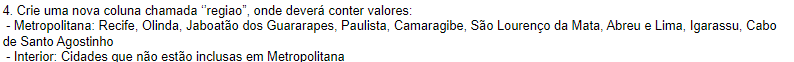

In [28]:
def getRegiao(municipio):
    metropolitanas = ['RECIFE', 'JABOATAO DOS GUARARAPES','OLINDA', 'PAULISTA', 'CAMARAGIBE', 'SAO LOURENCO DA MATA', 'ABREU E LIMA', 'IGARASSU', 'CABO DE SANTO AGOSTINHO']

    if municipio in metropolitanas:
        return 'METROPOLITANA'
    else:
        return 'INTERIOR'

In [29]:
tabela_regiao = tabela
tabela_regiao['regiao'] = tabela_regiao['municipio'].apply(lambda x: getRegiao(x))
tabela_regiao.head(10)

,_id,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao,regiao
0,1,Jovem Adulto,24,FEMININO,BRANCA,RECIFE,TRABALHADORES DA SAÚDE,NaN,FM3457,3 - COMIRNATY (PFIZER),3,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-02T00:00:00,METROPOLITANA
1,2,Criança,17,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FM3802,3 - COMIRNATY (PFIZER),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2021-12-24T00:00:00,METROPOLITANA
2,3,Criança,18,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FM3457,3 - COMIRNATY (PFIZER),1,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-12-03T00:00:00,METROPOLITANA
3,4,Jovem Adulto,25,FEMININO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FL4222,3 - COMIRNATY (PFIZER),2,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-12-28T00:00:00,METROPOLITANA
4,5,Jovem Adulto,24,FEMININO,BRANCA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,210378,1 - CORONAVAC - SINOVAC (BUTANTAN),2,DS 8: CNES: 0001198 - UBT ARISTARCHO DE AZEVEDO,Conecta Recife,2021-11-30T00:00:00,METROPOLITANA
5,6,Jovem Adulto,25,FEMININO,BRANCA,OLINDA,TRABALHADORES DA SAÚDE,NaN,FM3457,3 - COMIRNATY (PFIZER),3,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-12-03T00:00:00,METROPOLITANA
6,7,Jovem Adulto,26,MASCULINO,PARDA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FM3457,3 - COMIRNATY (PFIZER),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2021-12-03T00:00:00,METROPOLITANA
7,8,Criança,15,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FH4751,3 - COMIRNATY (PFIZER),2,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-12-02T00:00:00,METROPOLITANA
8,9,Criança,14,FEMININO,PRETA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,NaN,FM3802,3 - COMIRNATY (PFIZER),2,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2021-12-18T00:00:00,METROPOLITANA
9,10,Jovem Adulto,26,FEMININO,BRANCA,RECIFE,TRABALHADORES DA SAÚDE,NaN,FM3457,3 - COMIRNATY (PFIZER),3,DS 1: CNES: 000507 - POLICLÍNICA GOUVEIA DE BA...,Conecta Recife,2021-12-11T00:00:00,METROPOLITANA


In [30]:
tabela_regiao['regiao'].value_counts()

regiao
METROPOLITANA    976
INTERIOR          24
Name: count, dtype: int64

In [33]:
tabela_regiao[['regiao', 'faixa_etaria']].groupby('regiao')['faixa_etaria'].value_counts()

regiao         faixa_etaria        
INTERIOR       Jovem Adulto             23
               Adulto de meia idade      1
METROPOLITANA  Jovem Adulto            681
               Criança                 173
               Idoso                   106
               Adulto de meia idade     16
Name: count, dtype: int64

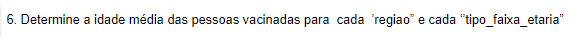

In [39]:
tabela_regiao.groupby(['regiao', 'faixa_etaria'])['idade'].mean().reset_index(name='idade_media')

,regiao,faixa_etaria,idade_media
0,INTERIOR,Adulto de meia idade,53.000000
1,INTERIOR,Jovem Adulto,25.043478
2,METROPOLITANA,Adulto de meia idade,51.125000
3,METROPOLITANA,Criança,15.057803
4,METROPOLITANA,Idoso,70.169811
5,METROPOLITANA,Jovem Adulto,25.478708


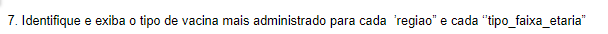

In [83]:
tabela_regiao.groupby(['regiao'])[['faixa_etaria', 'vacina_fabricante' ]].value_counts()

regiao         faixa_etaria          vacina_fabricante                                
INTERIOR       Jovem Adulto          3 - COMIRNATY (PFIZER)                                22
               Adulto de meia idade  3 - COMIRNATY (PFIZER)                                 1
               Jovem Adulto          2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)      1
METROPOLITANA  Jovem Adulto          3 - COMIRNATY (PFIZER)                               540
               Criança               3 - COMIRNATY (PFIZER)                               168
               Jovem Adulto          1 - CORONAVAC - SINOVAC (BUTANTAN)                   114
               Idoso                 3 - COMIRNATY (PFIZER)                               105
               Jovem Adulto          2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)     17
               Adulto de meia idade  3 - COMIRNATY (PFIZER)                                11
               Jovem Adulto          4 - JANSSEN COVID-19 VACCINE (

In [69]:
tabela_regiao.groupby(['regiao', 'faixa_etaria']).agg({
 'vacina_fabricante': 'max'   
})

vacina_fabricante
regiao        faixa_etaria                                                          
INTERIOR      Adulto de meia idade                            3 - COMIRNATY (PFIZER)
              Jovem Adulto                                    3 - COMIRNATY (PFIZER)
METROPOLITANA Adulto de meia idade  4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)
              Criança                                         3 - COMIRNATY (PFIZER)
              Idoso                                           3 - COMIRNATY (PFIZER)
              Jovem Adulto          4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)

In [80]:
tabela_regiao.groupby(['regiao', 'faixa_etaria'])['sexo'].value_counts()

regiao         faixa_etaria          sexo     
INTERIOR       Adulto de meia idade  FEMININO       1
               Jovem Adulto          FEMININO      14
                                     MASCULINO      9
METROPOLITANA  Adulto de meia idade  FEMININO       8
                                     MASCULINO      8
               Criança               MASCULINO     88
                                     FEMININO      85
               Idoso                 FEMININO      60
                                     MASCULINO     46
               Jovem Adulto          FEMININO     373
                                     MASCULINO    308
Name: count, dtype: int64